### Data Wrangling : Understanding the dataset

### importing important packages

In [18]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

### Objective : Create a model to catergorize true and fake news

#### Load the dataset

In [19]:
real= pd.read_csv('/Users/gargi/Desktop/DSC_SB/adanced_ml/True.csv')

In [20]:
fake = pd.read_csv('/Users/gargi/Desktop/DSC_SB/adanced_ml/Fake.csv')

In [21]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [22]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [23]:
real.shape

(21417, 4)

In [24]:
fake.shape

(23481, 4)

#### merging the dataframes

In [25]:
real['label'] = 1
fake['label'] = 0

In [26]:
data = pd.concat([real, fake])

In [27]:
data.shape

(44898, 5)

#### exploring the data

/Users/gargi/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

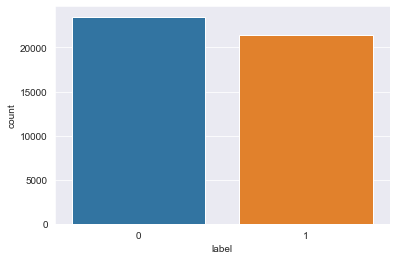

In [28]:
sns.set_style("darkgrid")
sns.countplot(data['label'])

Data looks balanced as there is not much difference in the label counts

In [29]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Data has no null values!! Good for me

In [30]:
data.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

5 columns

In [31]:
data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


/Users/gargi/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='subject', ylabel='count'>

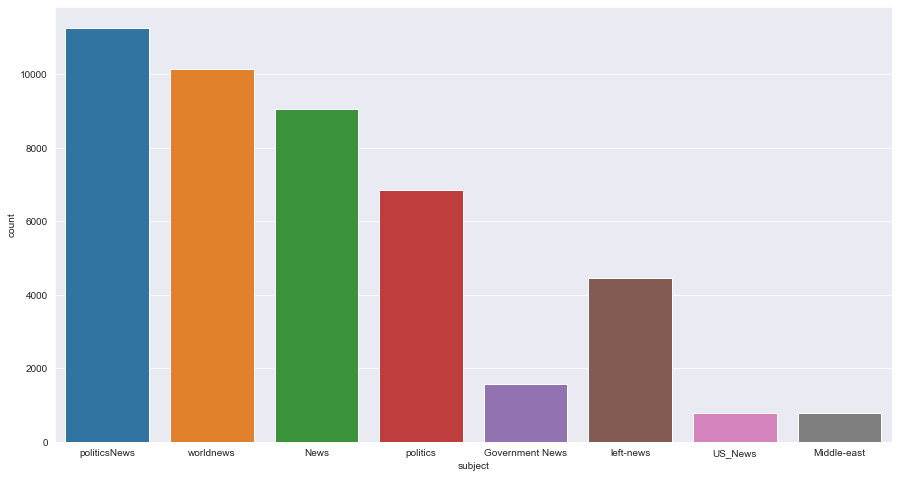

In [32]:
plt.figure(figsize = (15,8))

sns.countplot(data.subject)

[Text(0, 0, '0'), Text(1, 0, '1')]

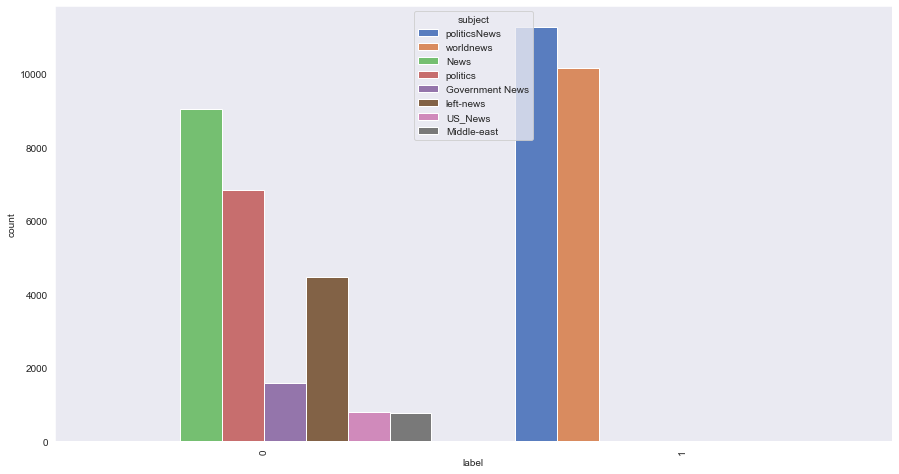

In [33]:
plt.figure(figsize = (15, 8))
sns.set_style("dark")
chart = sns.countplot(x = "label", hue = "subject" , data = data , palette = 'muted')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [34]:
data.dtypes

title      object
text       object
subject    object
date       object
label       int64
dtype: object

In [39]:
data['text'] = data['title'] + " " + data['text']
data = data.drop(['title', 'subject', 'date'], axis=1)


In [40]:
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [41]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['label'] == 0].text)) 

In [42]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/gargi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

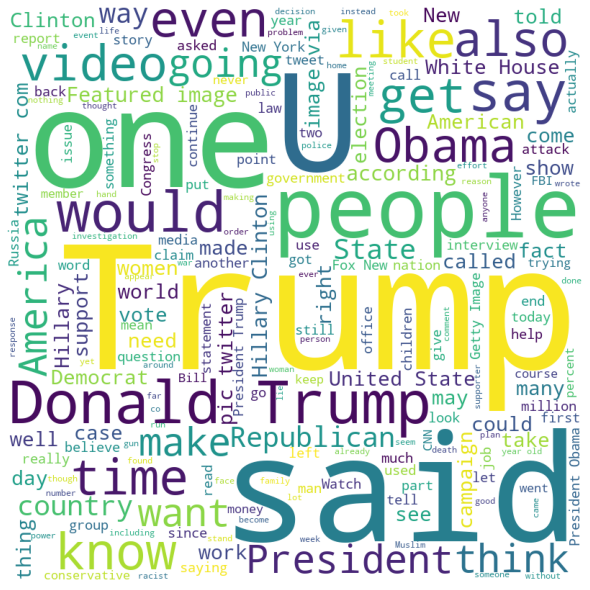

In [43]:
# plot the word cloud for fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

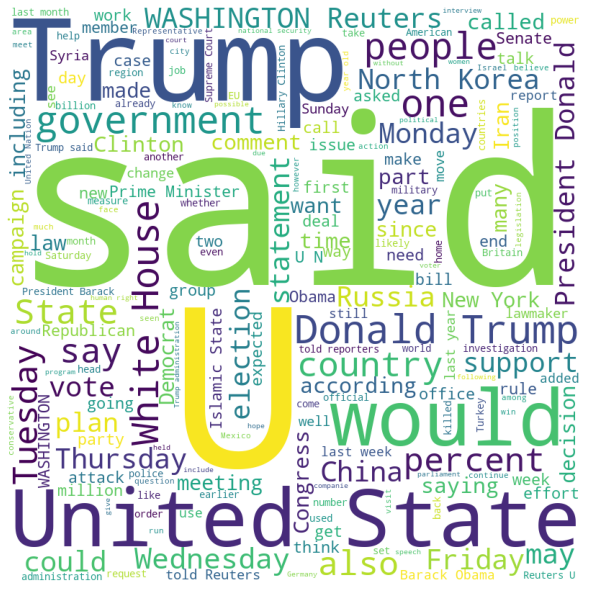

In [44]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(data[data['label'] == 1].text)) 
  
# plot the WordCloud image for genuine news data                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

In [45]:
data.to_csv('/Users/gargi/Desktop/DSC_SB/adanced_ml/tf_dw.csv')


#Summary
1. dataframe for true and fake do not have missing values
2. dataframe was given labels
3. EDA was done to explore the major subjects: politics and world news are two main subjects common in both true and falke dataframes
4. dataframe are balanced to proceed for prerocessing and modelling    